In [48]:
import pandas as pd

In [49]:
## Code : conda install -c conda-forge fbprophet
from fbprophet import Prophet

In [50]:
df = pd.read_csv("HospitalityEmployees.csv")

In [51]:
df.columns

Index(['Date', 'Employees'], dtype='object')

In [52]:
df.columns = ['ds','y']

In [53]:
df['ds'] = pd.to_datetime(df['ds'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      348 non-null    datetime64[ns]
 1   y       348 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.6 KB


In [54]:
df.head()

,ds,y
0,1990-01-01,1064.5
1,1990-02-01,1074.5
2,1990-03-01,1090.0
3,1990-04-01,1097.4
4,1990-05-01,1108.7


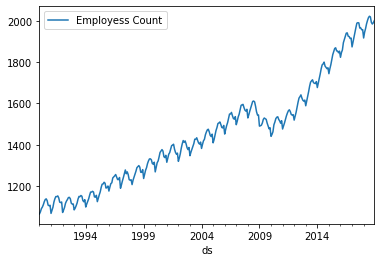

In [55]:
import matplotlib.pyplot as plt
# figsize = (12,8)
df.plot(x="ds",y='y',label = 'Employess Count')

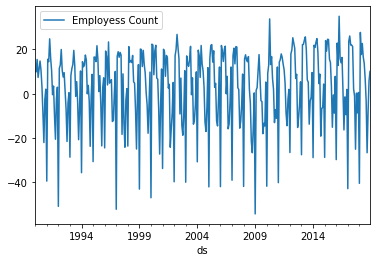

In [56]:
df['y'] = df['y'] - df['y'].shift(1)
df.plot(x="ds",y='y',label = 'Employess Count')

In [58]:
df.head()

,ds,y
0,1990-01-01,NaN
1,1990-02-01,10.0
2,1990-03-01,15.5
3,1990-04-01,7.4
4,1990-05-01,11.3


In [59]:
df = df[1:]

In [60]:
df.head()

,ds,y
1,1990-02-01,10.0
2,1990-03-01,15.5
3,1990-04-01,7.4
4,1990-05-01,11.3
5,1990-06-01,14.8


In [34]:
# df.plot(x="ds",y='y',figsize = (12,8),label = 'Employess Count')

In [61]:
len(df)

347

In [36]:
# train = df.iloc[:336]
# train.tail()

In [37]:
# test = df.iloc[336:]
# test.tail()

In [62]:
m = Prophet()

In [64]:
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [67]:
m

In [68]:
df.shape

(347, 2)

In [75]:
future = m.make_future_dataframe(periods=720)

In [76]:
future.shape

(1067, 1)

In [77]:
future

,ds
0,1990-02-01
1,1990-03-01
2,1990-04-01
3,1990-05-01
4,1990-06-01
...,...
1062,2020-11-16
1063,2020-11-17
1064,2020-11-18
1065,2020-11-19


In [78]:
forecast = m.predict(future)


In [79]:
# pd.set_option("display.max_rows",None)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1990-02-01,1.056417,9.486148,22.671562,1.056417,1.056417,14.789499,14.789499,14.789499,14.789499,14.789499,14.789499,0.0,0.0,0.0,15.845916
1,1990-03-01,1.064108,7.884743,22.720062,1.064108,1.064108,14.324841,14.324841,14.324841,14.324841,14.324841,14.324841,0.0,0.0,0.0,15.388949
2,1990-04-01,1.072624,7.982348,23.089086,1.072624,1.072624,14.866539,14.866539,14.866539,14.866539,14.866539,14.866539,0.0,0.0,0.0,15.939162
3,1990-05-01,1.080864,9.140290,24.076790,1.080864,1.080864,15.892780,15.892780,15.892780,15.892780,15.892780,15.892780,0.0,0.0,0.0,16.973645
4,1990-06-01,1.089380,7.210906,21.505685,1.089380,1.089380,13.159417,13.159417,13.159417,13.159417,13.159417,13.159417,0.0,0.0,0.0,14.248797


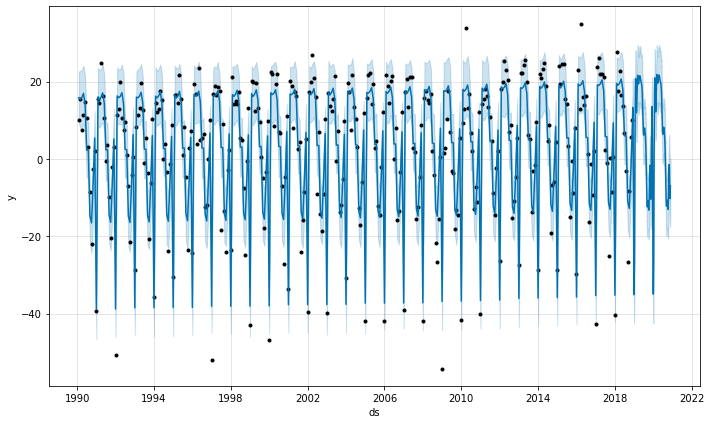

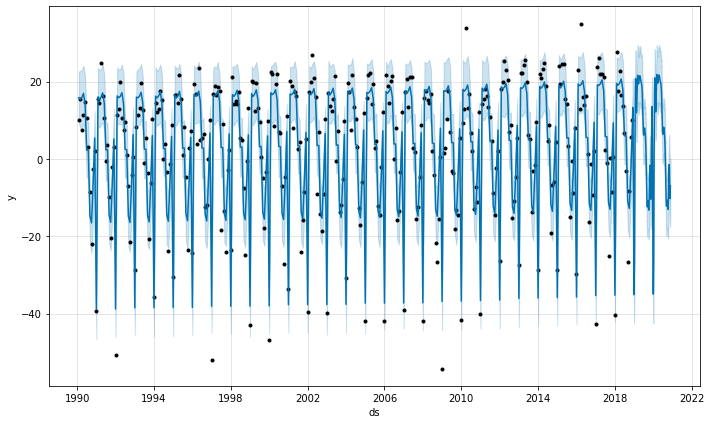

In [80]:
m.plot(forecast)

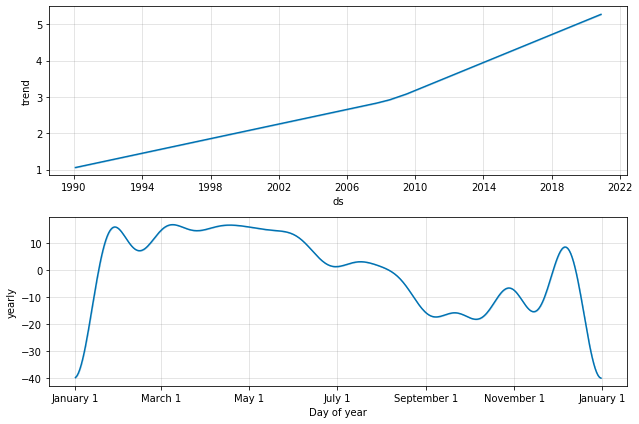

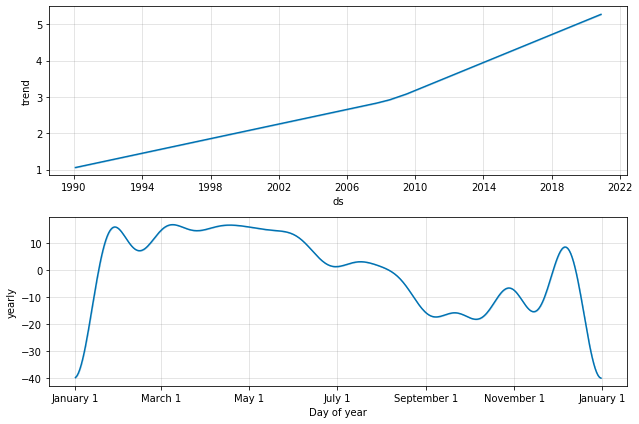

In [81]:
m.plot_components(forecast)

In [82]:
from fbprophet.diagnostics import cross_validation

In [83]:
df.shape

(347, 2)

In [84]:
cv =cross_validation(m,initial="347 days",period="180 days",horizon="720 days",)

INFO:fbprophet:Making 53 forecasts with cutoffs between 1991-04-27 00:00:00 and 2016-12-11 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbprophet:n_changepoints greater than number of observations. Using 20.


In [85]:
cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1991-05-01,7.288025,7.244978,7.321337,16.2,1991-04-27
1,1991-06-01,18.390369,18.237392,18.503638,10.5,1991-04-27
2,1991-07-01,13.027602,12.745088,13.239910,-0.4,1991-04-27
3,1991-08-01,9.694536,9.269191,10.037214,3.5,1991-04-27
4,1991-09-01,-9.974938,-10.547490,-9.479099,-9.8,1991-04-27


In [87]:
from fbprophet.plot import plot_cross_validation_metric

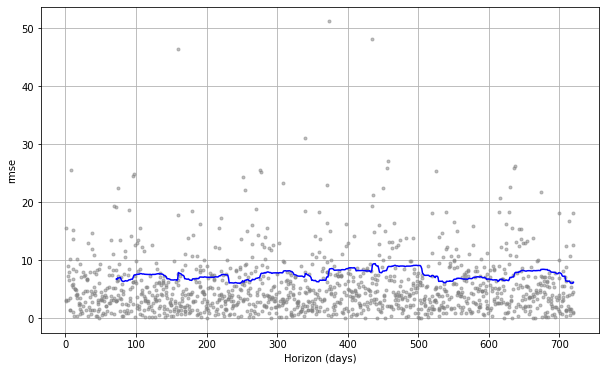

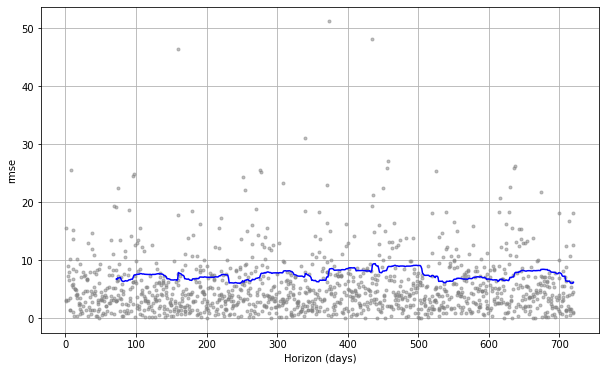

In [89]:
plot_cross_validation_metric(cv,metric ="rmse")

In [86]:
df.head()

,ds,y
1,1990-02-01,10.0
2,1990-03-01,15.5
3,1990-04-01,7.4
4,1990-05-01,11.3
5,1990-06-01,14.8


In [23]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

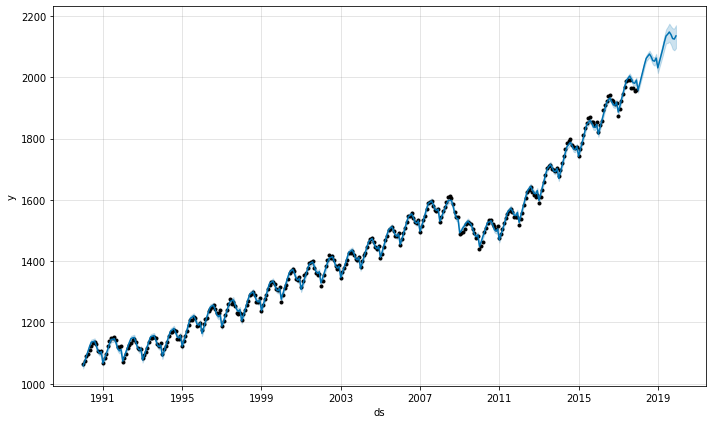

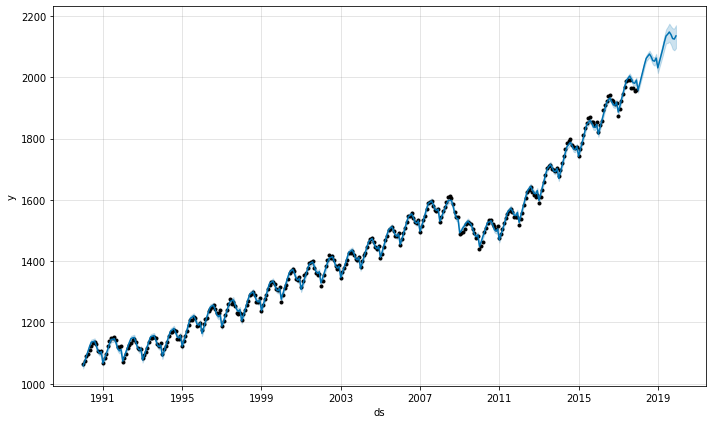

In [25]:
from fbprophet.plot import add_changepoints_to_plot
m.plot(forecast)

In [31]:
import pandas_datareader as web
import datetime

In [32]:
data = web.DataReader("AXISBANK.NS","yahoo",datetime.datetime(2019,1,1),datetime.datetime.now())

In [34]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-01,630.200012,621.900024,621.900024,627.299988,12179223.0,626.521912
2019-01-02,628.500000,617.500000,623.000000,620.049988,12386281.0,619.280884
2019-01-03,622.000000,603.650024,621.400024,607.950012,13228602.0,607.195923
2019-01-04,624.750000,609.500000,612.000000,619.599976,8381367.0,618.831421
2019-01-07,640.700012,624.200012,626.000000,637.450012,11735286.0,636.659363


In [35]:
data.reset_index(inplace=True)
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-01-01,630.200012,621.900024,621.900024,627.299988,12179223.0,626.521912
1,2019-01-02,628.500000,617.500000,623.000000,620.049988,12386281.0,619.280884
2,2019-01-03,622.000000,603.650024,621.400024,607.950012,13228602.0,607.195923
3,2019-01-04,624.750000,609.500000,612.000000,619.599976,8381367.0,618.831421
4,2019-01-07,640.700012,624.200012,626.000000,637.450012,11735286.0,636.659363


In [36]:
data["Date"] = pd.to_datetime(data["Date"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       371 non-null    datetime64[ns]
 1   High       371 non-null    float64       
 2   Low        371 non-null    float64       
 3   Open       371 non-null    float64       
 4   Close      371 non-null    float64       
 5   Volume     371 non-null    float64       
 6   Adj Close  371 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 20.4 KB


In [48]:
df1 =data[["Date","Close"]]
df1.columns = ["ds","y"]
df1.head()

,ds,y
0,2019-01-01,627.299988
1,2019-01-02,620.049988
2,2019-01-03,607.950012
3,2019-01-04,619.599976
4,2019-01-07,637.450012


In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      371 non-null    datetime64[ns]
 1   y       371 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.9 KB


In [50]:
len(df1)

371

In [51]:
train1 = df1.iloc[:350]
train1.tail()

,ds,y
345,2020-06-04,394.350006
346,2020-06-05,405.299988
347,2020-06-08,430.250000
348,2020-06-09,420.049988
349,2020-06-10,427.450012


In [52]:
test1 = df1.iloc[351:]
test1.tail()

,ds,y
366,2020-07-03,428.450012
367,2020-07-06,434.000000
368,2020-07-07,447.350006
369,2020-07-08,444.149994
370,2020-07-09,455.000000


In [53]:
p = Prophet()

In [54]:
p.fit(train1)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [56]:
future1 = p.make_future_dataframe(periods=12,freq='MS')
future1

,ds
0,2019-01-01
1,2019-01-02
2,2019-01-03
3,2019-01-04
4,2019-01-07
...,...
357,2021-02-01
358,2021-03-01
359,2021-04-01
360,2021-05-01


In [57]:
forecast1 = m.predict(future1)
forecast1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01,2077.116260,2014.651985,2047.792673,2062.555298,2091.639420,-46.091208,-46.091208,-46.091208,-46.091208,-46.091208,-46.091208,0.0,0.0,0.0,2031.025053
1,2019-01-02,2077.313774,2014.801625,2047.484333,2062.676094,2091.870082,-46.323277,-46.323277,-46.323277,-46.323277,-46.323277,-46.323277,0.0,0.0,0.0,2030.990497
2,2019-01-03,2077.511287,2015.137971,2048.848021,2062.796890,2092.100744,-46.322572,-46.322572,-46.322572,-46.322572,-46.322572,-46.322572,0.0,0.0,0.0,2031.188716
3,2019-01-04,2077.708801,2014.370710,2047.570475,2062.917687,2092.331406,-46.085507,-46.085507,-46.085507,-46.085507,-46.085507,-46.085507,0.0,0.0,0.0,2031.623294
4,2019-01-07,2078.301341,2018.086206,2052.389179,2063.280075,2093.027751,-43.984053,-43.984053,-43.984053,-43.984053,-43.984053,-43.984053,0.0,0.0,0.0,2034.317289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,2021-02-01,2227.621567,2113.844443,2284.258080,2145.813048,2314.679884,-32.452356,-32.452356,-32.452356,-32.452356,-32.452356,-32.452356,0.0,0.0,0.0,2195.169211
358,2021-03-01,2233.151946,2131.378956,2308.134436,2148.596722,2324.464327,-16.415822,-16.415822,-16.415822,-16.415822,-16.415822,-16.415822,0.0,0.0,0.0,2216.736123
359,2021-04-01,2239.274865,2146.084506,2333.553577,2151.234115,2334.615202,-2.041409,-2.041409,-2.041409,-2.041409,-2.041409,-2.041409,0.0,0.0,0.0,2237.233455
360,2021-05-01,2245.200271,2164.665395,2358.532584,2152.614366,2344.248527,14.001313,14.001313,14.001313,14.001313,14.001313,14.001313,0.0,0.0,0.0,2259.201583


In [58]:
forecast1.tail(50)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
312,2020-04-16,2170.145131,2133.269282,2247.499075,2117.276489,2227.283632,19.109209,19.109209,19.109209,19.109209,19.109209,19.109209,0.0,0.0,0.0,2189.254340
313,2020-04-17,2170.342644,2133.463795,2247.735604,2117.323193,2227.582214,19.644177,19.644177,19.644177,19.644177,19.644177,19.644177,0.0,0.0,0.0,2189.986822
314,2020-04-20,2170.935185,2136.120937,2247.939280,2117.463306,2228.477963,19.989098,19.989098,19.989098,19.989098,19.989098,19.989098,0.0,0.0,0.0,2190.924283
315,2020-04-21,2171.132698,2136.384943,2250.050278,2117.510010,2228.776546,19.724704,19.724704,19.724704,19.724704,19.724704,19.724704,0.0,0.0,0.0,2190.857403
316,2020-04-22,2171.330212,2135.877116,2245.963520,2117.614925,2229.075129,19.305176,19.305176,19.305176,19.305176,19.305176,19.305176,0.0,0.0,0.0,2190.635388
317,2020-04-23,2171.527726,2135.232910,2249.800392,2117.739398,2229.373712,18.758503,18.758503,18.758503,18.758503,18.758503,18.758503,0.0,0.0,0.0,2190.286229
318,2020-04-24,2171.725239,2134.251526,2248.885908,2117.713909,2229.667483,18.116402,18.116402,18.116402,18.116402,18.116402,18.116402,0.0,0.0,0.0,2189.841641
319,2020-04-27,2172.317780,2131.646977,2248.375271,2117.712498,2230.521387,15.970362,15.970362,15.970362,15.970362,15.970362,15.970362,0.0,0.0,0.0,2188.288141
320,2020-04-28,2172.515293,2133.463919,2247.322179,2117.757391,2230.806022,15.303959,15.303959,15.303959,15.303959,15.303959,15.303959,0.0,0.0,0.0,2187.819253
321,2020-04-29,2172.712807,2130.850857,2248.110241,2117.802285,2231.107501,14.721650,14.721650,14.721650,14.721650,14.721650,14.721650,0.0,0.0,0.0,2187.434457
